# **OVERVIEW**

## Nguyên Nhân Ra Đời Của Cây Nhị Phân Tìm Kiếm (Binary Search Tree - BST)

Cấu trúc cây (Tree) nói chung và Cây nhị phân tìm kiếm (BST) nói riêng đều sử dụng các **nút (node)** và **con trỏ (pointer)** để tổ chức dữ liệu, tương tự như Danh sách liên kết (Linked List). Tuy nhiên, BST ra đời nhằm khắc phục những nhược điểm cố hữu về hiệu năng của cấu trúc tuyến tính như Linked List.

### 1. **Khắc phục độ phức tạp thời gian của các thao tác cơ bản**

Trong một danh sách liên kết, các thao tác cơ bản có độ phức tạp như sau:

*   **Tìm kiếm (Search), Thêm (Insert), Xóa (Delete)** tại một vị trí cụ thể hoặc ở cuối danh sách thường yêu cầu duyệt qua một phần hoặc toàn bộ danh sách, dẫn đến độ phức tạp thời gian là **O(n)** trong trường hợp xấu nhất.
*   Mặc dù việc thêm/xóa ở **đầu** danh sách rất nhanh (**O(1)**), nhưng sự thiếu hiệu quả trong các thao tác khác trở thành một rào cản lớn khi làm việc với các tập dữ liệu lớn.

### 2. **Giải pháp của BST**

BST tổ chức dữ liệu theo kiểu phân cấp, cho phép loại bỏ một nửa số nút không phù hợp ở mỗi bước tìm kiếm. Nhờ đó:

*   Với một cây **cân bằng**, thời gian trung bình cho các thao tác tìm kiếm, thêm, xóa giảm xuống chỉ còn **O(log n)**.


Các thuật toán trên Linked List, dù khả thi, nhưng thường kém hiệu quả hơn so với trên BST.

[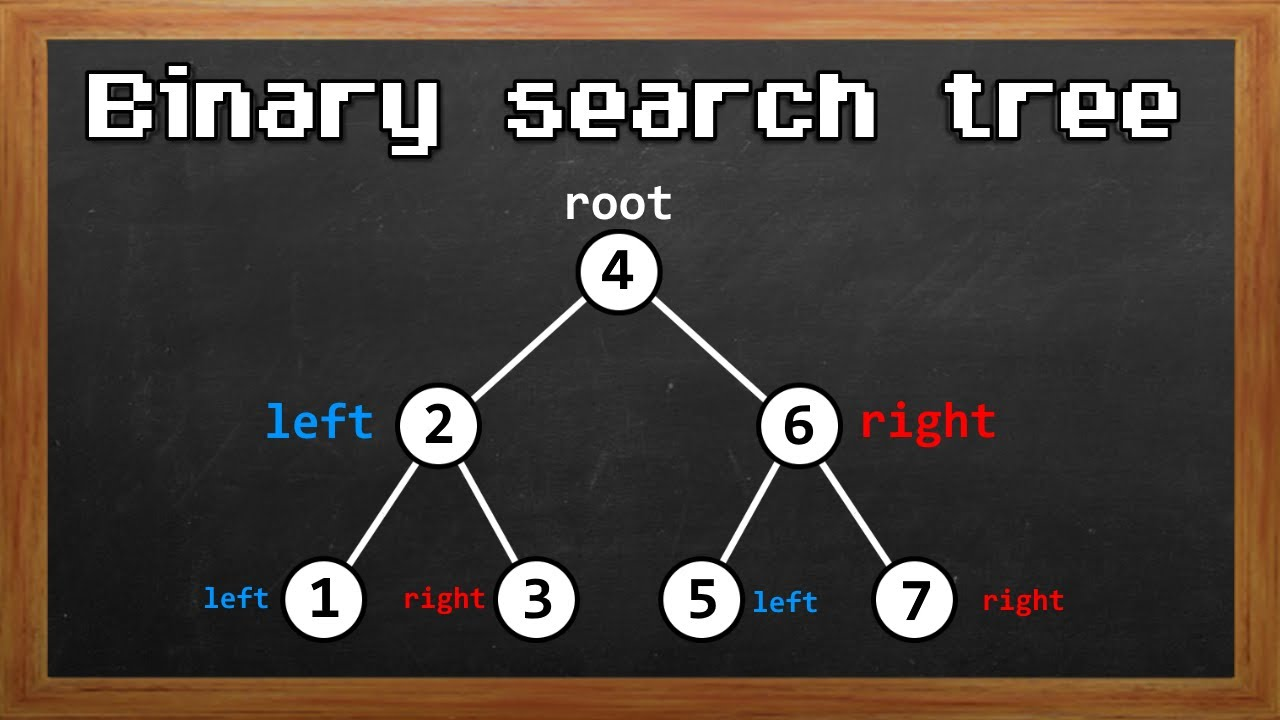](https://www.youtube.com/watch?app=desktop&v=Gt2yBZAhsGM&pp=ygUJI3RyZWVub2Rl)
----

# **ĐỊNH NGHĨA**

Để hiểu Cây nhị phân tìm kiếm, trước hết ta cần phân biệt nó với Cây nhị phân.

*   **Cây nhị phân (Binary Tree)**: Là một cấu trúc dữ liệu cây mà mỗi nút chỉ có **tối đa** hai con: một con trái và một con phải.

*   **Cây nhị phân tìm kiếm (Binary Search Tree - BST)**: Là một dạng đặc biệt của Cây nhị phân, phải thỏa mãn các thuộc tính sau đây với mọi nút trong cây:
    1.  **Cấu trúc nhị phân**: Mỗi nút có tối đa hai nút con.
    2.  **Thuộc tính tìm kiếm**:
        *   Tất cả các giá trị (khóa) trong **cây con trái** của một nút đều phải **nhỏ hơn** giá trị của nút đó.
        *   Tất cả các giá trị (khóa) trong **cây con phải** của một nút đều phải **lớn hơn** giá trị của nút đó.
    3.  **Tính đệ quy**: Cả hai cây con (trái và phải) của mỗi nút cũng phải là các cây nhị phân tìm kiếm.

*Lưu ý: Theo định nghĩa chuẩn, BST không chứa các giá trị trùng lặp.*

## **Hiệu năng**:

Chính nhờ thuộc tính tìm kiếm này, các thao tác trên BST có thể đạt hiệu suất rất cao. Khi tìm kiếm một giá trị, ta có thể loại bỏ toàn bộ một cây con (trái hoặc phải) ở mỗi bước so sánh.

*   **Trường hợp trung bình (cây cân bằng)**: Các thao tác tìm kiếm, thêm, xóa có độ phức tạp thời gian là **O(log n)**.
*   **Trường hợp xấu nhất (cây suy biến)**: Khi cây mất cân bằng và trở nên giống một danh sách liên kết (ví dụ: khi chèn các phần tử đã được sắp xếp), các thao tác trên sẽ có độ phức tạp là **O(n)**.


> 📌 **Ghi chú:**  
> Cây **suy biến** là cây mà các node con chủ yếu nằm về một phía (trái hoặc phải) so với node cha.  
>
> Ví dụ: Khi ta thêm dãy giá trị **tăng dần** hoặc **giảm dần** vào một cây nhị phân tìm kiếm (`Binary Search Tree`), với tính chất *nhỏ nằm bên trái, lớn nằm bên phải*, thì cây sẽ dần **nghiêng** về một bên (trái hoặc phải) và **biến thành một cấu trúc gần giống `Linked List`**.  
>
> 👉 Điều này khiến cho thời gian tìm kiếm, thêm, xóa không còn là `O(log n)` như mong đợi mà trở thành `O(n)`, làm mất đi ưu điểm chính của BST.

---

# **THAO TÁC TRÊN CÂY NHỊ PHÂN TÌM KIẾM**

Do cấu trúc của Cây có tính đệ quy (mỗi cây con cũng là một cây), việc sử dụng giải thuật `đệ quy` để mô tả và thực hiện các thao tác là cách tiếp cận tự nhiên và hiệu quả nhất. Vì vậy, tôi khuyến khích các bạn nên làm quen với tư duy đệ quy, có thể thông qua các video hướng dẫn trực quan trước khi đọc chi tiết.


## **THÊM (INSERT)**

**Ý tưởng cốt lõi**: Để duy trì thuộc tính "trái < cha < phải", chúng ta phải tìm đúng vị trí để chèn một giá trị mới vào cây.

Quá trình này diễn ra như sau:
1.  Bắt đầu từ nút gốc của cây.
2.  So sánh giá trị cần thêm với giá trị của nút hiện tại.
    *   Nếu giá trị mới **nhỏ hơn**, ta di chuyển đến **cây con trái**.
    *   Nếu giá trị mới **lớn hơn**, ta di chuyển đến **cây con phải**.
3.  Lặp lại bước 2 cho đến khi ta gặp một vị trí trống (tức là một con trỏ `null` hoặc `None`). Đây chính là vị trí hợp lệ để chèn nút mới.
4.  Gắn nút mới vào vị trí trống đó.



## **XÓA (DELETE)**

Trong các cấu trúc cây nói chung, `xóa` là thao tác phức tạp nhất, vì chúng ta phải đảm bảo rằng sau khi xóa một nút, các thuộc tính của Cây nhị phân tìm kiếm vẫn được bảo toàn.

Thao tác `Xóa` được chia thành 3 trường hợp chính, tùy thuộc vào số lượng con của nút cần xóa.

#### **Trường hợp 1: Nút cần xóa là nút lá (không có con nào)**

Đây là trường hợp đơn giản nhất. Ta chỉ cần tìm đến nút cha của nó và cập nhật lại con trỏ (là `.left` hoặc `.right` đang trỏ tới nút cần xóa) thành `None`. Về cơ bản là ta ngắt kết nối nút lá ra khỏi cây.

#### **Trường hợp 2: Nút cần xóa có MỘT con (chỉ có con trái hoặc chỉ có con phải)**

Trong trường hợp này, ta sẽ "bỏ qua" nút cần xóa và nối trực tiếp nút cha của nó với nút con duy nhất của nó.
Nói cách khác, con trỏ của nút cha (trỏ đến nút cần xóa) sẽ được cập nhật để trỏ thẳng đến nút cháu.

#### **Trường hợp 3: Nút cần xóa có ĐẦY ĐỦ HAI con**

Đây là trường hợp phức tạp nhất vì chúng ta không thể xóa nút này một cách trực tiếp mà không phá vỡ cấu trúc cây. Quá trình xử lý gồm các bước sau:
1.  **Tìm một nút thay thế**: Để lấp vào vị trí của nút bị xóa, ta cần tìm một nút khác trong cây sao cho thuộc tính tìm kiếm vẫn được duy trì. Có hai lựa chọn phổ biến cho nút thay thế:
    *   **Phần tử nhỏ nhất trong cây con phải**.
    *   Hoặc **Phần tử lớn nhất trong cây con trái** .

2.  **Sao chép giá trị**: Sau khi tìm được nút thay thế, ta **sao chép giá trị** của nút thay thế vào vị trí của nút mà ta muốn xóa. Lúc này, nút cần xóa ban đầu đã có một giá trị mới, và cấu trúc cây không còn giá trị cần xóa nữa.

3.  **Xóa nút thay thế**: Bây giờ, vấn đề đã chuyển thành việc **xóa nút thay thế** khỏi vị trí ban đầu của nó. Việc xóa nó sẽ luôn rơi vào **Trường hợp 1** hoặc **Trường hợp 2**, là những trường hợp đơn giản hơn mà ta đã biết cách giải quyết.

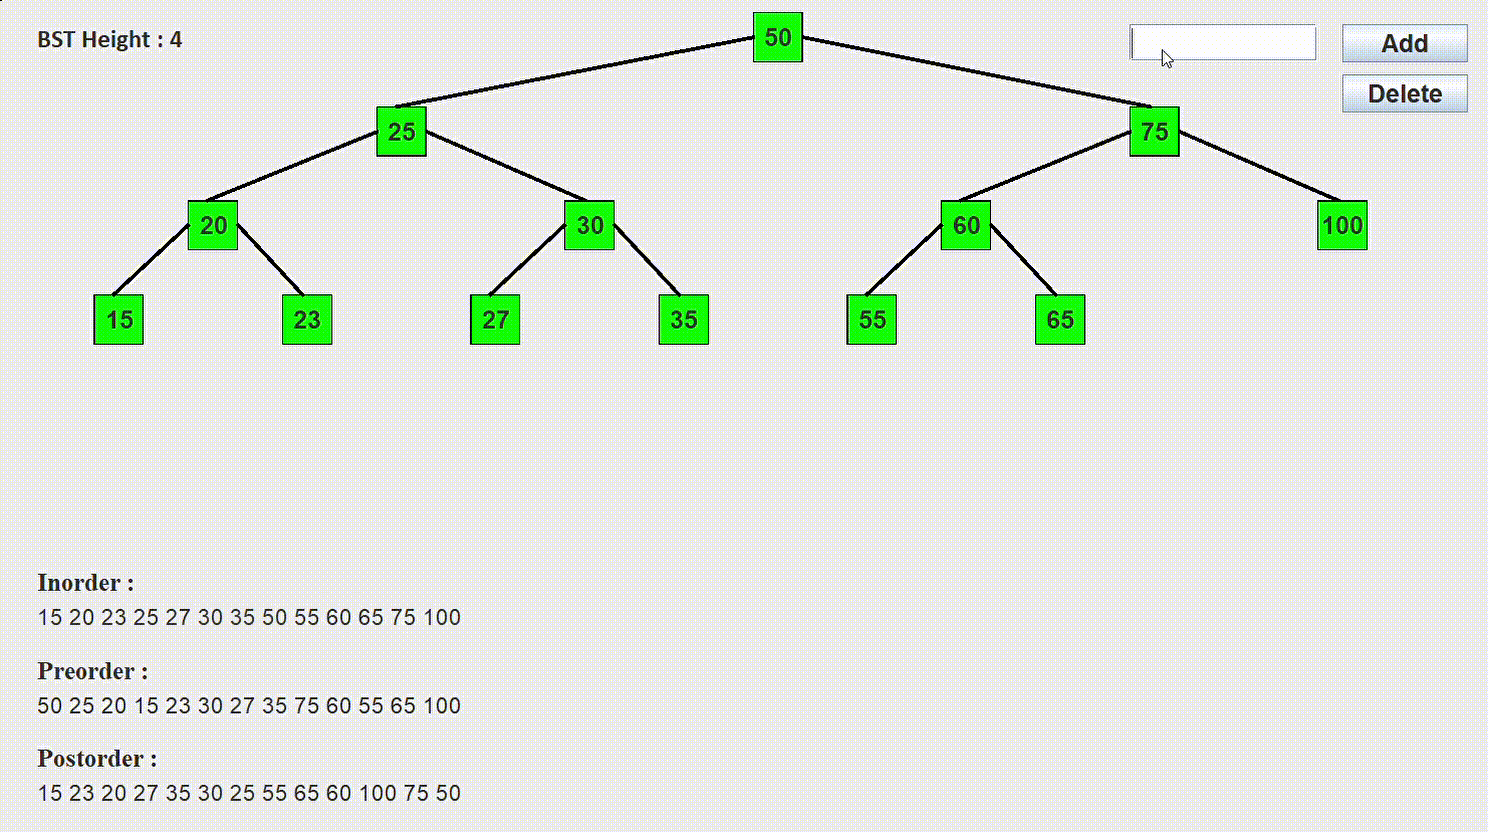

## **DUYỆT (INVERSE)**

Trong cấu trúc BST không có chức năng `sắp xếp` tăng dần hay giảm dần như trong `mảng` hay `Link List`. Việc tăng hay giảm phụ thuộc vào cách **duyệt cây** của chúng ta.

Hiện đang có `3 cách` duyệt BST phổ biến:

1. **Pre-order**: Duyệt theo thứ tự `Node → Left → Right`
   - Duyệt gốc trước, sau đó tới cây con trái và cuối cùng là cây con phải.
   - Ứng dụng: Sao chép cây.

2. **In-order**: Duyệt theo thứ tự `Left → Node → Right`
   - Duyệt cây con trái trước, sau đó đến node gốc và cuối cùng là cây con phải.
   - Ứng dụng: Lấy ra các phần tử theo thứ tự **tăng dần** trong BST.

3. **Post-order**: Duyệt theo thứ tự `Left → Right → Node`
   - Duyệt cây con trái trước, sau đó cây con phải, cuối cùng mới đến node gốc.
   - Ứng dụng: Xóa cây.


>👉 **Duyệt giảm dần (Inverse In-order)**:
> Để duyệt cây BST theo thứ tự `giảm dần`, ta chỉ cần đảo ngược thứ tự của >In-order thông thường, tức là: `Right → Node → Left`
>Kỹ thuật này thường gọi là `Reverse In-order` hay `Inverse In-order Traversal`, cho ra các phần tử theo thứ tự giảm dần.


---

# **CODE**

- Trong bài `notebook` này, mình sẽ tiến hành **xây dựng lại cấu trúc `Binary Search Tree` từ đầu** `(from scratch)` bằng ngôn ngữ **Python** mà không sử dụng bất kỳ thư viện hỗ trợ sẵn nào.
- Mỗi hàm trong đoạn code đều được **comment giải thích chi tiết** để giúp các bạn dễ dàng theo dõi và hiểu được chức năng của từng phần.


> 💬 **Lưu ý**:  
> Vì kiến thức còn hạn chế, bài viết này mang tính chất **tham khảo**. Nếu có điều gì thiếu sót hoặc chưa hợp lý, mình rất mong nhận được sự góp ý từ mọi người để hoàn thiện hơn.  
> **Xin chân thành cảm ơn!** 😌😌😌

In [ ]:
class Node:
  def __init__(self, val):
    self.val = val
    self.right = None
    self.left = None


In [ ]:
class BinarySearchTree:
  # Hàm khởi tạo
  def __init__(self):
    self.__root = None

  # Chức năng thêm
  def __add(self, val: int , root: None) -> Node:
    new_node = Node(val)
    # Nếu Node hiện tại là None -> Node trước nó là Node cần thêm
    if root is None:
      return new_node
    else:
      # Tìm nhánh có Node phù hợp để thêm
      if new_node.val > root.val:
        root.right = self.__add(val, root.right)
      else:
        root.left = self.__add(val, root.left)

    return root

  # Hàm tìm Node nhỏ nhất bên nhánh phải
  def __find_Smallest_Right(self, root: Node) -> Node:
    # Nếu không có Node bên trái nữa thì nó chính là Node trái cuối cùng
    if root.left is None:
      return root
    else:
    # Tiếp tục tìm kiếm
      return self.__find_Smallest_Right(root.left)

  # Chức năng xóa
  def __delete(self, val: int , root: Node) -> Node:
    if root is None:
      return root

    # Tìm nhánh phù hợp chứa Node cần xóa
    if val > root.val:
      root.right = self.__delete(val, root.right)
      return root

    if val < root.val:
      root.left = self.__delete(val, root.left)
      return root

    # Node hiện tại là Node cần xóa
    if val == root.val:
      # Trường hợp không có node lá
       if root.right is None and  root.left is None:
          return None

      # Trường hợp có một node lá
       if root.right is None:
          return root.left
       if root.left is None:
          return root.right

      # Trường hợp có 2 node lá
       smallest_right = self.__find_Smallest_Right(root.right)
       root.val = smallest_right.val
       root.right = self.__delete(smallest_right.val, root.right)
       return root

  # Chức năng duyệt mảng In-order
  def __inverse(self, root: Node) -> None:
    if root is None:
      return None

    self.__inverse(root.left)
    print(f"{root.val} ")
    self.__inverse(root.right)


  # Chức năng tìm
  def __search(self, root: Node, val: int) -> bool:
    if root is None:
      return False

    if root.val == val:
      return True

    if val > root.val:
      return self.__search(root.right, val)

    return self.__search(root.left, val)

  ### Các hàm dưới đây mới được người dùng sử dụng tránh người dùng biết
  ### được nó hoạt động của code theo OOP (tính đóng gói)

  def add(self, val: int) -> None:
    self.root = self.__add(val,self.__root)


  def delete(self, val: int) -> None:
    self.root = self.__delete(val, self.__root)


  def inverse(self) -> None:
    self.__inverse(self.__root)

  def search(self, val: int) -> bool:
    return self.__search(self.__root, val)

In [ ]:
# Test case cho chức năng thêm
myTree = BinarySearchTree()
myTree.add(4)
myTree.add(2)
myTree.add(6)
myTree.add(1)
myTree.add(3)
myTree.add(5)
myTree.add(7)
myTree.add(0)
myTree.add(8)
myTree.inverse()

False


In [ ]:
# Testcase cho chức năng xóa
myTree.delete(6)
myTree.inverse()

In [ ]:
# Testcase cho chức năng tìm
find_val = 10
print(f"Số {find_val} có tồn tại trong tree không: {myTree.search(find_val)}")

 # **MỘT SỐ BÀI TẬP RÈN LUYỆN VỀ BINARY SEARCH TREE**

 - Các bài tập Link list dưới đây được tôi lấy từ các bài tập trên `LEETCODE`, tôi tổng hợp được một số bài tập có thể xem là `Kinh điển` để bạn có thể ôn tập lại về `Binary Search Tree`. Do bản thân tôi cũng không có tư duy tốt về cấu trúc BST nên không tổng hợp các bài phức tạp hoặc có thể xuất hiện trong `phỏng vấn` mong các bạn thông cảm 😘😘😘
 ---

## [LEETCODE 100. Same Tree](https://leetcode.com/problems/same-tree/description/)  **`EASY`**

Given the roots of two binary trees p and q, write a function to check if they are the same or not.

Two binary trees are considered the same if they are structurally identical, and the nodes have the same value.

In [ ]:
### Đối với các bài toàn dạng cây nói chung, chúng ta không thể sử dụng mảng như trong link list được
### giả sử ta có 2 cây như sau [1 ,2] và [1 ,null ,2] khi đưa nó vào mảng cả 2 đều sẽ là arr = [1,2] nhưng thực tế
### chúng là 2 cây khác nhau một cây giá trị 2 ở nhánh trái, còn cây còn lại thi 2 nằm ở nhánh phải do đó
### sử dụng mảng là một cách tiếp cận sai. Chúng ta cần có hướng tiếp cận nó Binary Search Tree hơn


### Trong bài toán này, ta sẽ dùng các thuật toán duyệt (inverse) để giải quyết, mỗi lần duyệt ta sẽ kiễm tra xem
### giá trị của p.val == q.val hay không, nếu không trả về False cho đến khi hết cây


class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    # Hàm duyệt theo pre-order
    def inverse(self, p, q) -> bool:
        # Nếu cả 2 đều duyệt hết mà không có gì xảy ra thì return True
        if p is None and q is None:
            return True

        # Một bên null một bên không có -> có sự khác nhau
        if p is None or q is None:
            return False

        # 2 giá trị trị lại khác nhau trong vị trí node khác nhau
        if p.val != q.val:
            return False

        # Kiễm tra nhánh trái và phải của nó
        left = self.inverse(p.left, q.left)
        right = self.inverse(p.right, q.right)

        return left and right

    def isSameTree(self, p: Optional[TreeNode], q: Optional[TreeNode]) -> bool:
        return self.inverse(p, q)

## [LEETCODE 450. Delete Node in a BST](https://leetcode.com/problems/delete-node-in-a-bst/description/)  **`MEDIUM`**

Given a root node reference of a BST and a key, delete the node with the given key in the BST. Return the root node reference (possibly updated) of the BST.

Basically, the deletion can be divided into two stages:

1. Search for a node to remove.
2. If the node is found, delete the node.

In [ ]:
### Đối với bài này thi ta đã có cách giải nằm trong phần CODE của tôi rồi 🫣🫣🫣
### nên chỉ cần khai triễn lại theo đúng format của Leetcode thôi

class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right


class Solution:
    # Hàm tìm con phải bé nhất (successor)
    def FindSmallestRight(self,root):
        if root.left is None:
            return root
        return self.FindSmallestRight(root.left)

    # Hàm xóa
    def deleteNode(self, root: Optional[TreeNode], key: int) -> Optional[TreeNode]:
        # Nếu duyệt đến hết root mà không tìm được node cần xóa hoặc root ban đầu là rỗng thì trả về None luôn
        if not root:
            return None

        # Đang kiễm node cần xóa
        if key > root.val:
            root.right = self.deleteNode(root.right, key)
            return root
        elif key < root.val:
            root.left = self.deleteNode(root.left, key)
            return root
        else:
            # Trường hợp xóa node lá
            if not root.left and not root.right:
                return None
                        # Trường hợp xóa node lá
            elif root.left and not root.right:
                return root.left
            elif root.right and not root.left:
                return root.right
            else:
                max_right_node = self.FindSmallestRight(root.right)
                root.val = max_right_node.val
                root.right = self.deleteNode(root.right, root.val)

        return root

## [LEETCODE 104. Maximum Depth of Binary Tree](https://leetcode.com/problems/maximum-depth-of-binary-tree/description/)  **`EASY`**

Given the root of a binary tree, return its maximum depth.

A binary tree's maximum depth is the number of nodes along the longest path from the root node down to the farthest leaf node.

In [ ]:
### Đối với bài này thì chúng ta sẽ cũng sẽ dùng cách duyệt (inverse) từ trên xuống dưới
### mỗi lẫn duyệt chúng ta sẽ cộng độ cao của cây lên 1. Ngoài ra chúng ta sẽ duyệt 2 nhánh của
### root riêng (left , right) rồi từ đó so sánh bên nào có độ cao lớn nhất thì lấy

class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def maxDepth(self, root: Optional[TreeNode]) -> int:
        # Nếu ban đầu root là rỗng
        if root is None:

            return 0
        # Duyệt cây
        left = self.maxDepth(root.left)
        right = self.maxDepth(root.right)

        # Lấy max của 2 nhánh trái và phải rồi sau đó cộng thêm 1 là do độ cao từ node root đến 2 nhánh đó nữa
        return max(left , right) + 1

## [LEETCODE 112. Path Sum](https://leetcode.com/problems/path-sum/description/)  **`EASY`**

Given the root of a binary tree and an integer targetSum, return true if the tree has a root-to-leaf path such that adding up all the values along the path equals targetSum.

A leaf is a node with no children.

In [ ]:
### Đề bài yêu cầu là có con đường nào đi từ root đến node lá nào có tổng như dề bài yêu cầu không
### Cách tiếp cận cũng chính là sử dụng duyệt, khi node hiện tại là None thì sẽ tiến hành kiễm tra
### Xem tổng của nó có bằng đề bài không


class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    # Tận dụng hàm mục tiêu làm hàm duyệt luôn
    def hasPathSum(self, root: Optional[TreeNode], targetSum: int) -> bool:

        # Nếu ban đầu root là None hoặc đã tới node lá rồi mà không không tìm được
        # đường đi thì trả về None luôn
        if root is None:
            return False

        # Tới Node lá thì kiễm tra có tổng đường đi có kết quả giống với target
        # không
        if not root.left and not root.right:
            if root.val == targetSum:
                return True

        # Xét theo 2 nhánh
        left = self.hasPathSum(root.left, targetSum - root.val)
        right = self.hasPathSum(root.right, targetSum - root.val)

        return left or right

## [LEETCODE 110. Balanced Binary Tree](https://leetcode.com/problems/balanced-binary-tree/description/)  **`EASY`**

Given a binary tree, determine if it is height-balanced.

In [ ]:
### Đối với bài này thì chúng ta sẽ tận dụng code của LEETCODE 104. Maximum Depth
### of Binary Tree của bài trên. Chúng ta sẽ chỉnh sửa lại một xíu để phù hợp với
### bài toán của chúng ta. Mỗi lần khi tìm được độ của của left và right rồi chúng
### ta sẽ tiến hành so sánh độ cao của 2 nhánh đó nếu nó lớn hơn 1 thì trả về
### False

class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    # Hàm hổ trợ tìm chiều cao cây
    def height_compare(self, root: Optional[TreeNode]) -> int:
        # Nếu root là rỗng hoặc duyệt hết Node
        if root is None:
            return 0

        left = self.height_compare(root.left)
        right = self.height_compare(root.right)

        # Tiến hành so sanh chiều cao của 2 nhánh hiện tại
        if abs(left - right) > 1:
            return -1

        # Trường hợp cả 2 nhánh điều -1 thì max(-1, -1) + 1 sẽ là 0 nên cần phải
        # return lại ngay luôn
        if left == -1 or right == -1:
            return - 1

        return max(left, right) + 1

    def isBalanced(self, root: Optional[TreeNode]) -> bool:
        return self.height_compare(root) != -1

# TADA HẾT RỒI !!! 🥳🥳🥳🥳

Cảm ơn các bạn đã đọc hết bài `notebook` này, mong các bạn góp ý và ủng hộ mình trong các bài `notebook` tiếp theo về `DSA` nhé 😌😌😌